**Project 2**


**stats of 2016 - 2022 IPL Analysis**


In [53]:
import pandas as pd

In [54]:
import matplotlib.pyplot as plt

In [55]:
import seaborn as sns

**Analysis of batting**

In [56]:
# List of file paths
file_paths = [
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2016.xlsx",
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2017.xlsx",
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2018.xlsx",
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2019.xlsx",
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2020.xlsx",
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2021.xlsx",
    r"C:\Users\HP\Desktop\project2\batting stats\BATTING STATS - IPL_2022.xlsx",
]

batting_stats = pd.DataFrame(
    columns=[
        "POS",
        "Player",
        "Mat",
        "Inns",
        "NO",
        "Runs",
        "HS",
        "Avg",
        "BF",
        "SR",
        "4s",
        "6s",
    ]
)

for file_path in file_paths:
    df = pd.read_excel(file_path)
    df["HS"] = pd.to_numeric(df["HS"], errors="coerce")  # Convert 'HS' to numeric
    for index, row in df.iterrows():
        existing_player = batting_stats[batting_stats["Player"] == row["Player"]]
        if existing_player.empty:
            batting_stats = batting_stats.append(row, ignore_index=True)
        else:
            existing_index = existing_player.index[0]
            batting_stats.at[existing_index, "Mat"] += row["Mat"]
            batting_stats.at[existing_index, "Inns"] += row["Inns"]
            batting_stats.at[existing_index, "NO"] += row["NO"]
            batting_stats.at[existing_index, "Runs"] += row["Runs"]
            batting_stats.at[existing_index, "BF"] += row["BF"]
            batting_stats.at[existing_index, "4s"] += row["4s"]
            batting_stats.at[existing_index, "6s"] += row["6s"]
            batting_stats.at[existing_index, "HS"] = max(
                batting_stats.at[existing_index, "HS"], row["HS"]
            )


batting_stats["Avg"] = batting_stats.apply(
    lambda row: row["Runs"] / (row["Inns"] - row["NO"])
    if row["Inns"] - row["NO"] > 0
    else 0,
    axis=1,
)
batting_stats["SR"] = batting_stats.apply(
    lambda row: (row["Runs"] / row["BF"]) * 100 if row["BF"] > 0 else 0, axis=1
)

batting_stats

C:\Users\HP\AppData\Local\Temp\ipykernel_30064\1922610372.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_stats = batting_stats.append(row, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_30064\1922610372.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_stats = batting_stats.append(row, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_30064\1922610372.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_stats = batting_stats.append(row, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_30064\1922610372.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  batting_stats = b

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,4s,6s,100,50
0,1,Virat Kohli,100,100,13,3487,113,40.080460,2618,133.193277,302,108,4.0,7.0
1,2,David Warner,79,79,13,3356,126,50.848485,2368,141.722973,327,113,0.0,9.0
2,3,AB de Villiers,80,77,17,2592,129,43.200000,1629,159.116022,195,148,1.0,6.0
3,4,Gautam Gambhir,37,36,6,1084,90,36.133333,888,122.072072,123,14,0.0,5.0
4,5,Shikhar Dhawan,110,110,15,3663,106,38.557895,2825,129.663717,404,82,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,150,Umran Malik,14,4,3,4,3,4.000000,8,50.000000,0,0,0.0,0.0
333,152,Kumar Kartikeya Singh,4,1,0,3,3,3.000000,5,60.000000,0,0,0.0,0.0
334,154,Harshit Rana,2,2,1,2,2,2.000000,2,100.000000,0,0,0.0,0.0
335,156,Tristan Stubbs,2,2,0,2,2,1.000000,4,50.000000,0,0,0.0,0.0


In [57]:
batting_stats["Avg"] = batting_stats["Avg"].apply(lambda x: round(x, 3))
batting_stats["SR"] = batting_stats["SR"].apply(lambda x: round(x, 3))

In [58]:
# Calculate the total balls faced and total boundaries (4s and 6s) for each player

batting_stats["Total_Boundaries"] = batting_stats["4s"] + batting_stats["6s"]

# Calculate the ratio of balls per boundary, handling division by zero
batting_stats["Balls_Per_Boundary"] = batting_stats.apply(
    lambda row: row["BF"] / row["Total_Boundaries"]
    if row["Total_Boundaries"] > 0
    else 0,
    axis=1,
)

batting_stats

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,4s,6s,100,50,Total_Boundaries,Balls_Per_Boundary
0,1,Virat Kohli,100,100,13,3487,113,40.080,2618,133.193,302,108,4.0,7.0,410,6.385366
1,2,David Warner,79,79,13,3356,126,50.848,2368,141.723,327,113,0.0,9.0,440,5.381818
2,3,AB de Villiers,80,77,17,2592,129,43.200,1629,159.116,195,148,1.0,6.0,343,4.749271
3,4,Gautam Gambhir,37,36,6,1084,90,36.133,888,122.072,123,14,0.0,5.0,137,6.481752
4,5,Shikhar Dhawan,110,110,15,3663,106,38.558,2825,129.664,404,82,0.0,4.0,486,5.812757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,150,Umran Malik,14,4,3,4,3,4.000,8,50.000,0,0,0.0,0.0,0,0.000000
333,152,Kumar Kartikeya Singh,4,1,0,3,3,3.000,5,60.000,0,0,0.0,0.0,0,0.000000
334,154,Harshit Rana,2,2,1,2,2,2.000,2,100.000,0,0,0.0,0.0,0,0.000000
335,156,Tristan Stubbs,2,2,0,2,2,1.000,4,50.000,0,0,0.0,0.0,0,0.000000


In [59]:
# Assuming you have a DataFrame named batting_stats and a list of column names to convert
columns_to_convert = ["Runs", "HS", "Avg", "BF", "SR", "4s", "6s", 100, 50]

# Loop through the columns and convert them to numeric
for col in columns_to_convert:
    batting_stats[col] = pd.to_numeric(batting_stats[col], errors="coerce")



In [60]:
batting_stats.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,4s,6s,100,50,Total_Boundaries,Balls_Per_Boundary
0,1,Virat Kohli,100,100,13,3487,113,40.080,2618,133.193,302,108,4.0,7.0,410,6.385366
1,2,David Warner,79,79,13,3356,126,50.848,2368,141.723,327,113,0.0,9.0,440,5.381818
2,3,AB de Villiers,80,77,17,2592,129,43.200,1629,159.116,195,148,1.0,6.0,343,4.749271
3,4,Gautam Gambhir,37,36,6,1084,90,36.133,888,122.072,123,14,0.0,5.0,137,6.481752
4,5,Shikhar Dhawan,110,110,15,3663,106,38.558,2825,129.664,404,82,0.0,4.0,486,5.812757


In [61]:
batting_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Runs,337.0,394.115727,695.644705,0.0,15.000000,67.000000,404.000000,3663.000
HS,337.0,37.735905,34.609277,0.0,9.000000,25.000000,65.000000,140.000
Avg,337.0,16.394139,11.771925,0.0,7.000000,15.000000,25.000000,53.955
BF,337.0,296.833828,509.400367,1.0,19.000000,57.000000,303.000000,2825.000
SR,337.0,110.270199,42.476436,0.0,89.583000,118.182000,133.939000,400.000
4s,337.0,34.694362,64.515445,0.0,1.000000,5.000000,35.000000,404.000
6s,337.0,16.267062,29.632670,0.0,0.000000,2.000000,18.000000,156.000
100,337.0,0.029674,0.254152,0.0,0.000000,0.000000,0.000000,4.000
50,337.0,0.462908,1.202411,0.0,0.000000,0.000000,0.000000,9.000
Balls_Per_Boundary,337.0,7.185650,5.649015,0.0,4.899225,6.333333,8.833333,44.000


C:\Users\HP\AppData\Local\Temp\ipykernel_30064\2021826810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = batting_stats.corr()


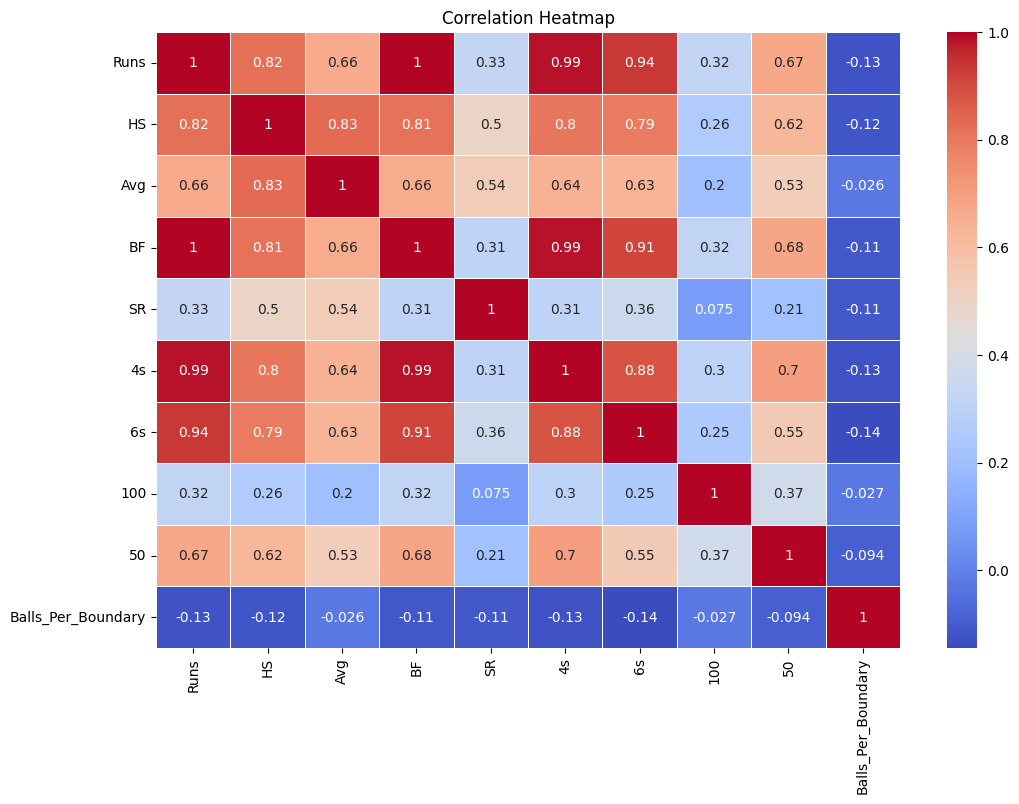

In [62]:
# Correlation Heatmap
correlation_matrix = batting_stats.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [63]:
batting_stats.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_30064\2725961258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  batting_stats.corr()


,Runs,HS,Avg,BF,SR,4s,6s,100,50,Balls_Per_Boundary
Runs,1.000000,0.818782,0.660840,0.996522,0.326203,0.985623,0.935120,0.316758,0.672039,-0.126135
HS,0.818782,1.000000,0.834440,0.813900,0.495365,0.804039,0.789967,0.261767,0.622006,-0.120144
Avg,0.660840,0.834440,1.000000,0.656652,0.539199,0.640924,0.629078,0.204317,0.532794,-0.026432
BF,0.996522,0.813900,0.656652,1.000000,0.309626,0.985564,0.911231,0.316634,0.678362,-0.114521
SR,0.326203,0.495365,0.539199,0.309626,1.000000,0.307855,0.360525,0.075220,0.212496,-0.109527
4s,0.985623,0.804039,0.640924,0.985564,0.307855,1.000000,0.881798,0.298960,0.696135,-0.128092
6s,0.935120,0.789967,0.629078,0.911231,0.360525,0.881798,1.000000,0.251861,0.549649,-0.144348
100,0.316758,0.261767,0.204317,0.316634,0.075220,0.298960,0.251861,1.000000,0.373695,-0.027327
50,0.672039,0.622006,0.532794,0.678362,0.212496,0.696135,0.549649,0.373695,1.000000,-0.093741
Balls_Per_Boundary,-0.126135,-0.120144,-0.026432,-0.114521,-0.109527,-0.128092,-0.144348,-0.027327,-0.093741,1.000000


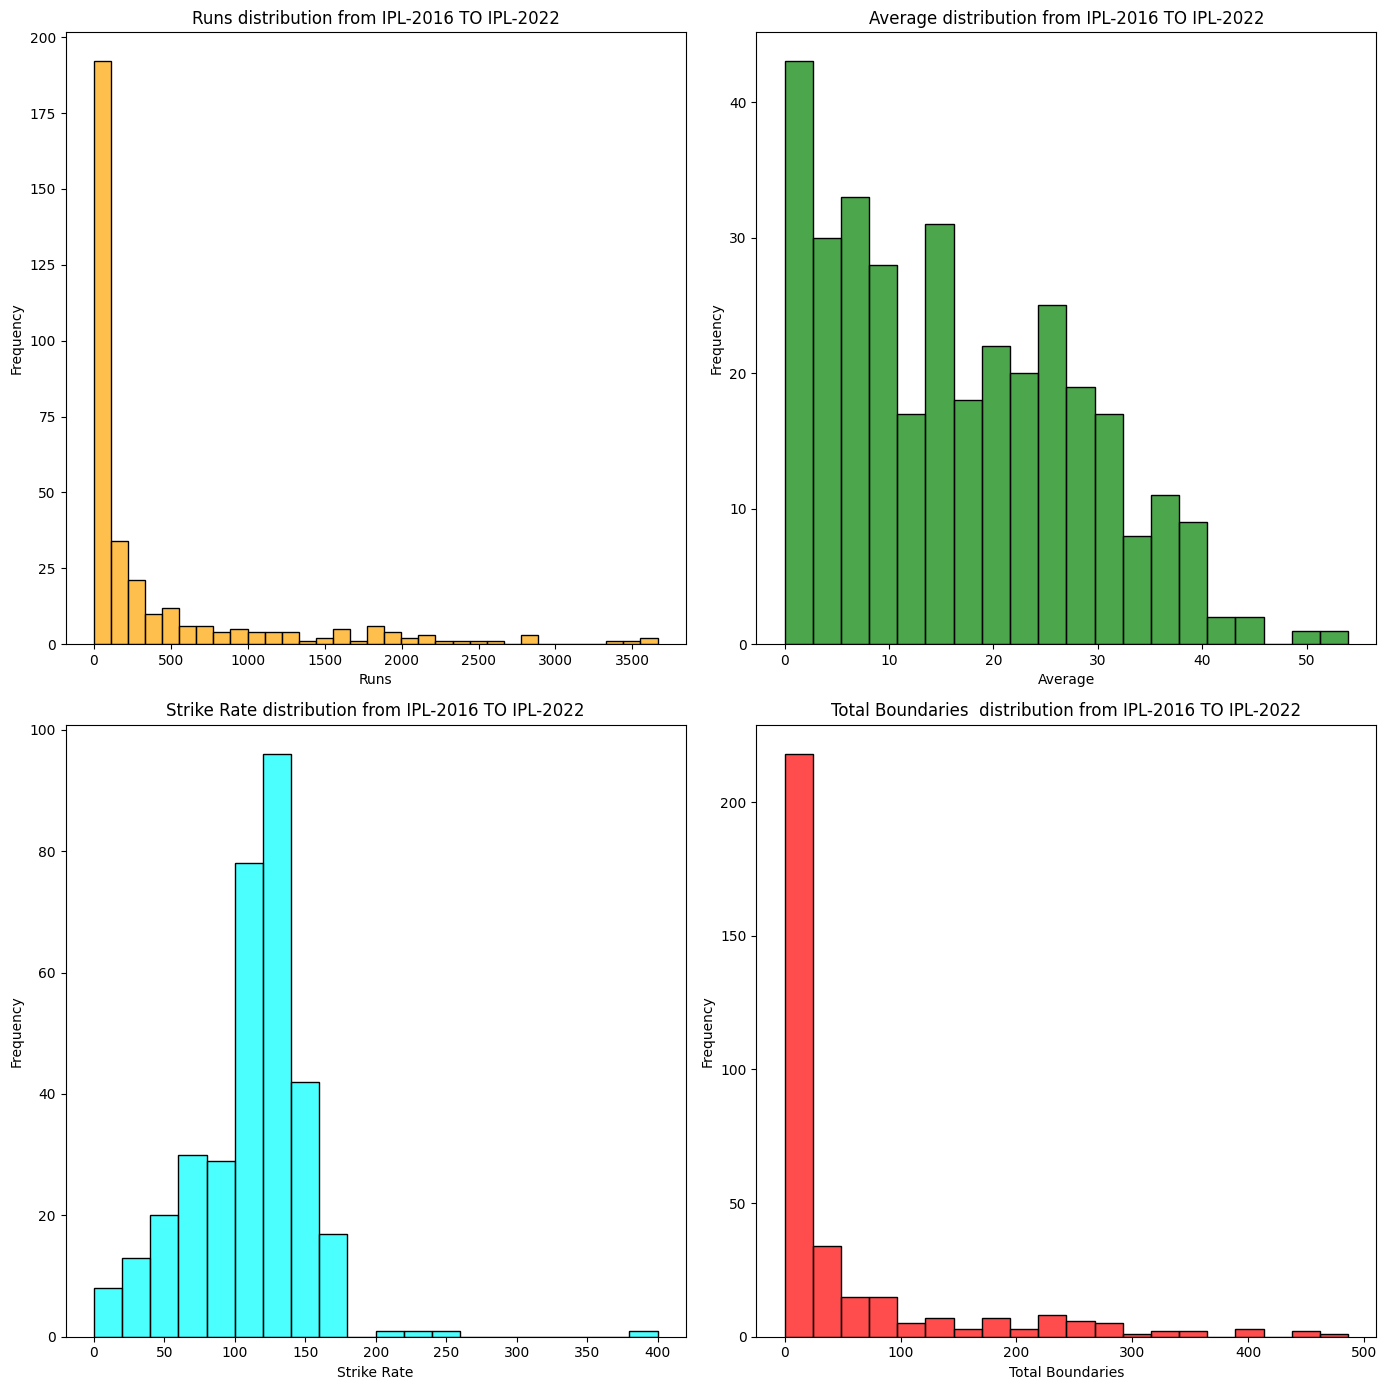

In [64]:

fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Subplot 1: Runs distribution
sns.histplot(batting_stats["Runs"], ax=axes[0, 0], color="orange", alpha=0.7)
axes[0, 0].set_xlabel("Runs")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Runs distribution from IPL-2016 TO IPL-2022")

# Subplot 2: average distribution
sns.histplot(batting_stats["Avg"], ax=axes[0, 1], bins=20, color="green", alpha=0.7)
axes[0, 1].set_xlabel("Average")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("Average distribution from IPL-2016 TO IPL-2022")


# Subplot 3: Strke Rate distribution
sns.histplot(batting_stats["SR"], ax=axes[1, 0], color="aqua", bins=20, alpha=0.7)
axes[1, 0].set_xlabel("Strike Rate")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Strike Rate distribution from IPL-2016 TO IPL-2022")

# Subplot 4: Total Boundary  distribution
sns.histplot(
    batting_stats["Total_Boundaries"], ax=axes[1, 1], color="red", bins=20, alpha=0.7
)
axes[1, 1].set_xlabel("Total Boundaries")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("Total Boundaries  distribution from IPL-2016 TO IPL-2022")


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

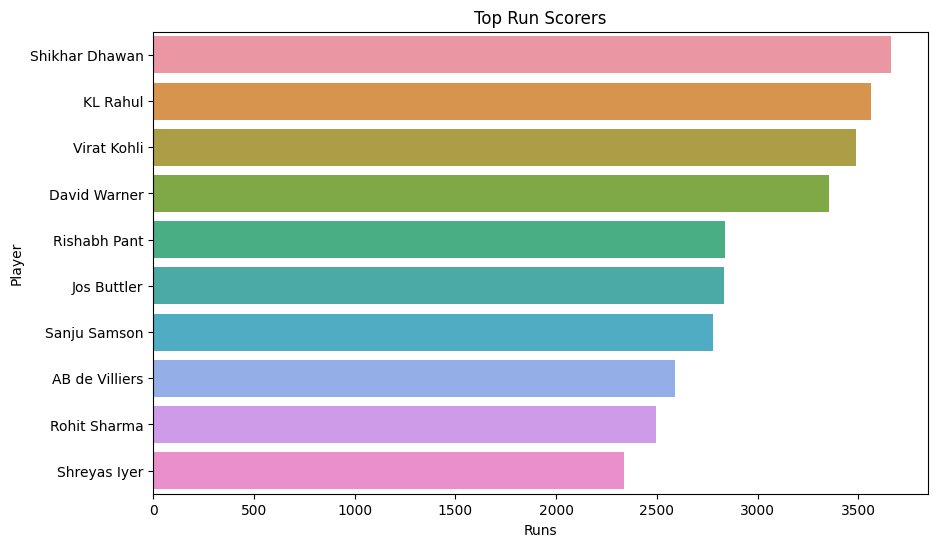

In [65]:

top_run_scorers = batting_stats.sort_values(by="Runs", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Runs", y="Player", data=top_run_scorers)
plt.title("Top Run Scorers")
plt.xlabel("Runs")
plt.ylabel("Player")

plt.show()

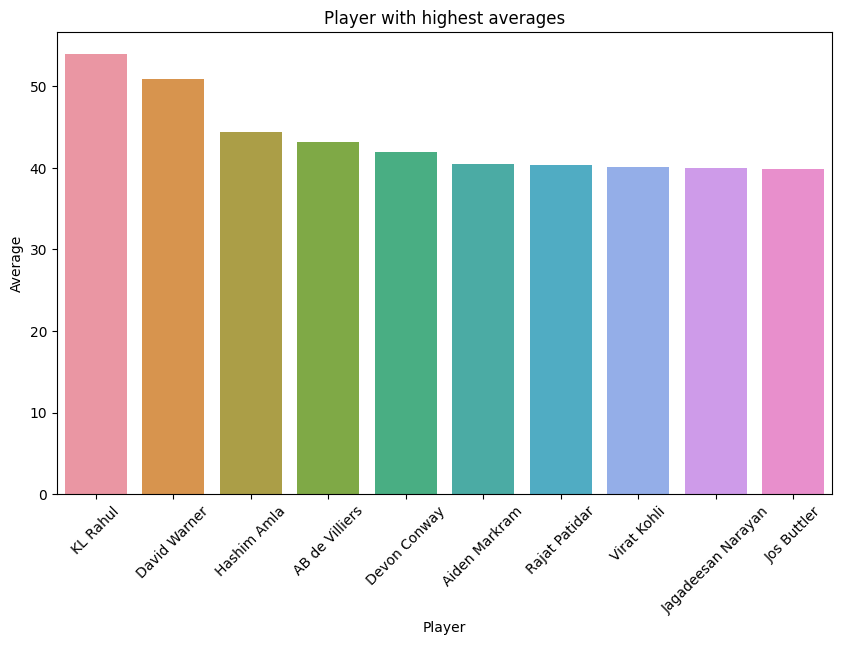

In [66]:
sns.set_palette("husl")
top_avg = batting_stats.sort_values(by="Avg", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Player", y="Avg", data=top_avg)
plt.title("Player with highest averages")
plt.xlabel("Player")
plt.ylabel("Average")
plt.xticks(rotation=45)

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_30064\219993919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Strike_Rate"] = (filtered_df["Runs"] / filtered_df["BF"]) * 100


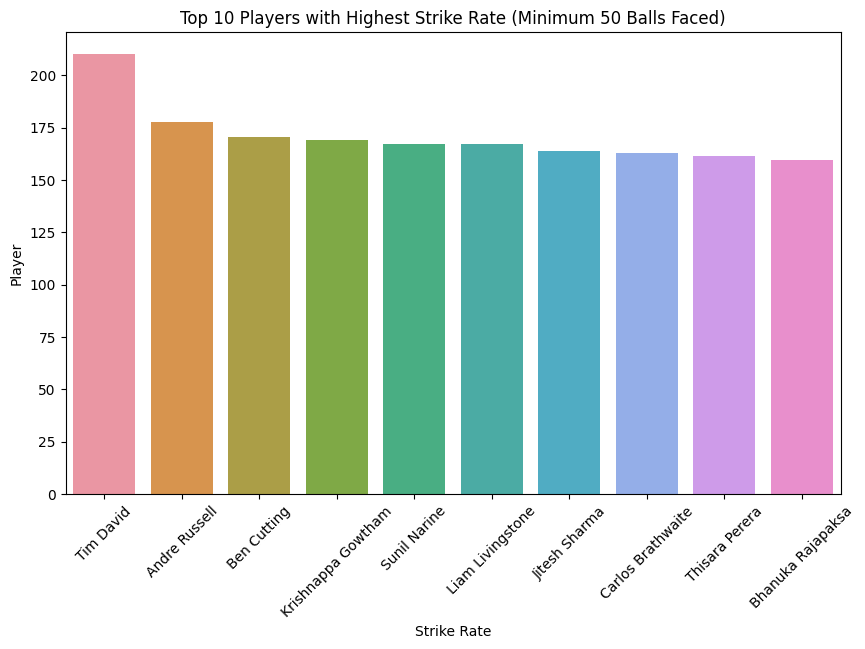

In [67]:
# color settings
sns.set_palette("Reds_d")

filtered_df = batting_stats[batting_stats["BF"] >= 50]

# Calculate strike rate
filtered_df["Strike_Rate"] = (filtered_df["Runs"] / filtered_df["BF"]) * 100

# Sort by strike rate in descending order
sorted_df = filtered_df.sort_values(by="Strike_Rate", ascending=False)

# Select top 10 players
top_SR_50 = sorted_df.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x="Player", y="SR", data=top_SR_50)
plt.xlabel("Strike Rate")
plt.ylabel("Player")
plt.xticks(rotation=45)
plt.title("Top 10 Players with Highest Strike Rate (Minimum 50 Balls Faced)")
plt.show()

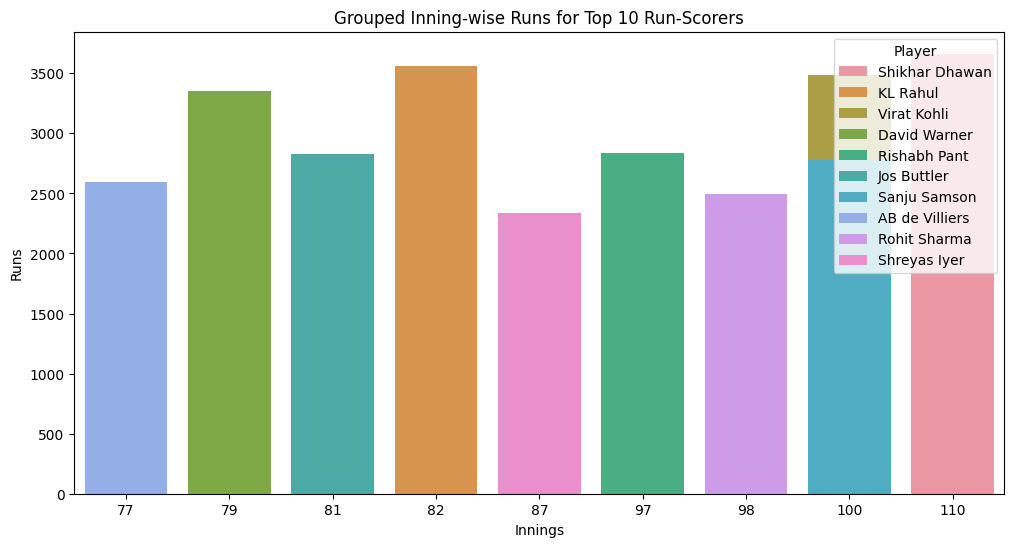

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Inns", y="Runs", data=top_run_scorers, hue="Player", dodge=False)

# Set labels and title
plt.xlabel("Innings")
plt.ylabel("Runs")
plt.title("Grouped Inning-wise Runs for Top 10 Run-Scorers")

# Show the plot
plt.show()

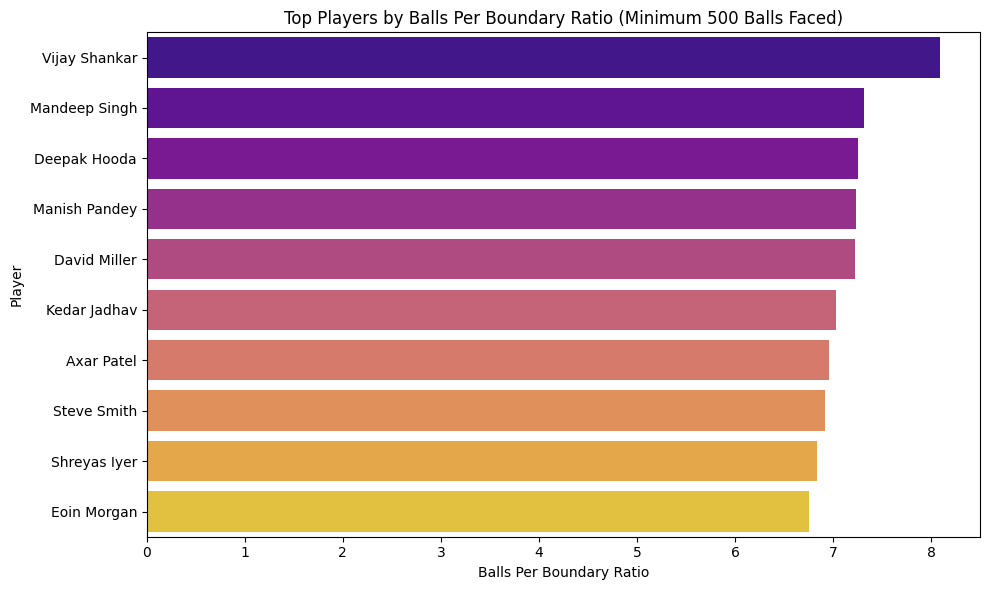

In [69]:
# Filter players who have faced at least 500 balls
min_balls_faced = 500
filtered_df = batting_stats[batting_stats["BF"] >= min_balls_faced]

# Sort the filtered DataFrame by Balls_Per_Boundary in descending order
sorted_df = filtered_df.sort_values(by="Balls_Per_Boundary", ascending=False)

# Select top N players for the bar chart
top_n = 10
top_players = sorted_df.head(top_n)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Balls_Per_Boundary", y="Player", data=top_players, palette="plasma")
plt.xlabel("Balls Per Boundary Ratio")
plt.ylabel("Player")
plt.title(
    f"Top Players by Balls Per Boundary Ratio (Minimum {min_balls_faced} Balls Faced)"
)
plt.tight_layout()
plt.show()

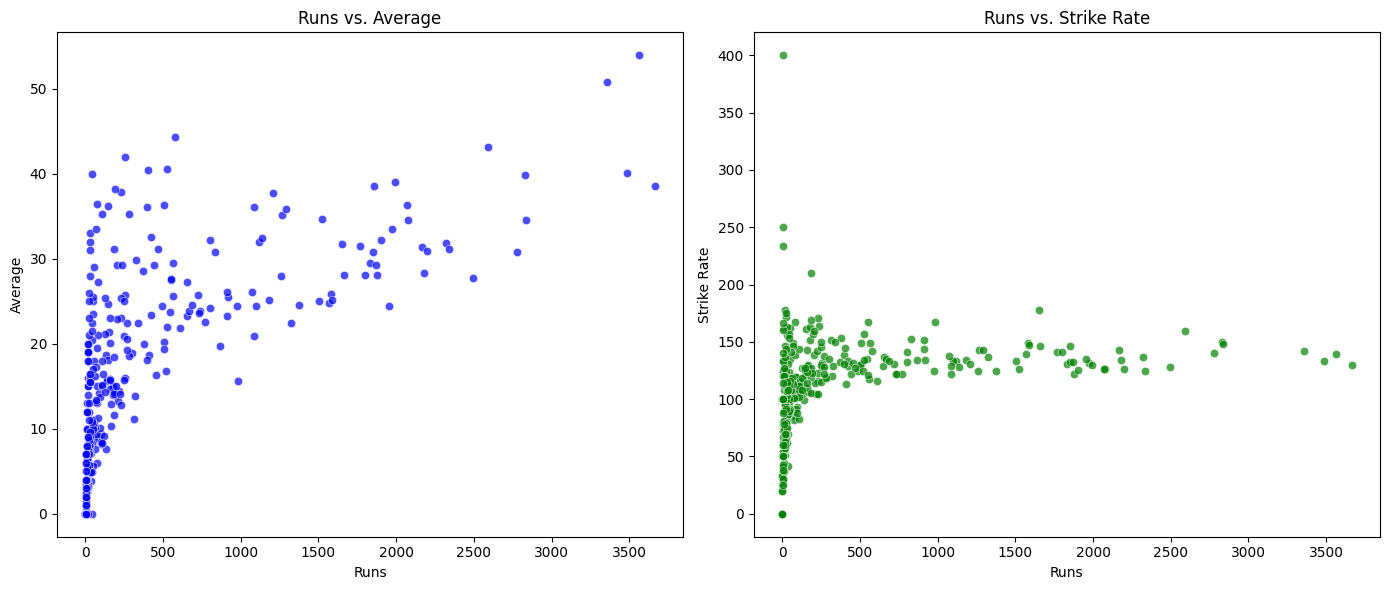

In [70]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Runs vs. Average
sns.scatterplot(data=batting_stats, x="Runs", y="Avg", ax=axes[0], color="blue", alpha=0.7)
axes[0].set_xlabel("Runs")
axes[0].set_ylabel("Average")
axes[0].set_title("Runs vs. Average")

# Subplot 2: Runs vs. Strike Rate
sns.scatterplot(data=batting_stats, x="Runs", y="SR", ax=axes[1], color="green", alpha=0.7)
axes[1].set_xlabel("Runs")
axes[1].set_ylabel("Strike Rate")
axes[1].set_title("Runs vs. Strike Rate")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

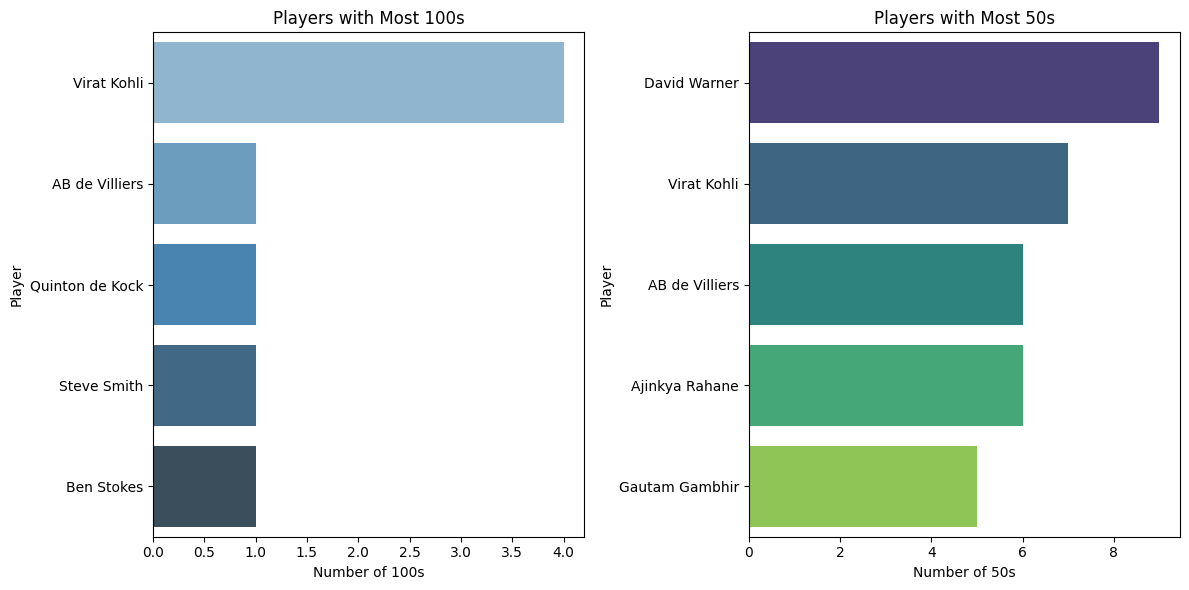

In [71]:
# Calculate the top 10 players with the most 100s and 50s
top_5_100s = batting_stats.nlargest(5, 100)
top_5_50s = batting_stats.nlargest(5, 50)

# Create two separate bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for most 100s
sns.barplot(data=top_5_100s, x=100, y="Player", ax=axes[0], palette="Blues_d")
axes[0].set_xlabel("Number of 100s")
axes[0].set_ylabel("Player")
axes[0].set_title("Players with Most 100s")

# Bar plot for most 50s
sns.barplot(data=top_5_50s, x=50, y="Player", ax=axes[1], palette="viridis")
axes[1].set_xlabel("Number of 50s")
axes[1].set_ylabel("Player")
axes[1].set_title("Players with Most 50s")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

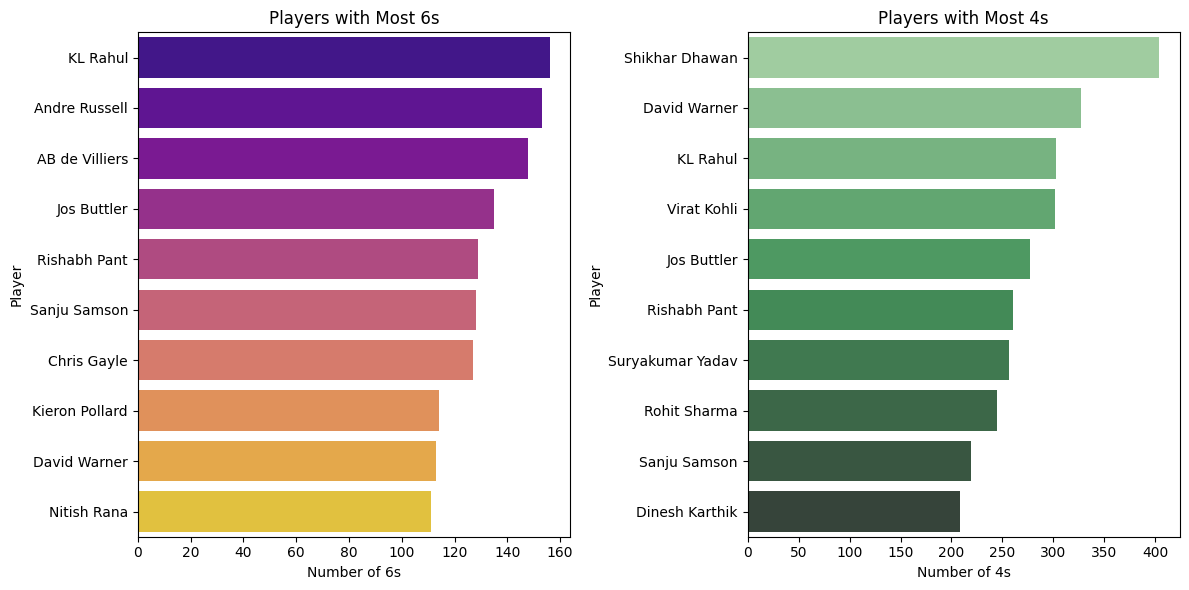

In [72]:
# Calculate the top 10 players with the most 6s and 4s
top_10_6s = batting_stats.nlargest(10, "6s")
top_10_4s = batting_stats.nlargest(10, "4s")

# Create two separate bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for most 6s
sns.barplot(data=top_10_6s, x="6s", y="Player", ax=axes[0], palette="plasma")
axes[0].set_xlabel("Number of 6s")
axes[0].set_ylabel("Player")
axes[0].set_title("Players with Most 6s")

# Bar plot for most 4s
sns.barplot(data=top_10_4s, x="4s", y="Player", ax=axes[1], palette="Greens_d")
axes[1].set_xlabel("Number of 4s")
axes[1].set_ylabel("Player")
axes[1].set_title("Players with Most 4s")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

**Bowling Analysis**

In [73]:
import pandas as pd

# List of file paths for bowling statistics
bowling_file_paths = [
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2016.xlsx",
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2017.xlsx",
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2018.xlsx",
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2019.xlsx",
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2020.xlsx",
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2021.xlsx",
    r"C:\Users\HP\Desktop\project2\bowling stats\BOWLING STATS - IPL_2022.xlsx"

]

bowling_stats = pd.DataFrame(columns=['POS', 'Player', 'Mat', 'Inns', 'Ov', 'Runs', 'Wkts', 'Avg', 'Econ', 'SR', '4w', '5w'])

for file_path in bowling_file_paths:
    df = pd.read_excel(file_path)
    df = df.drop(columns=['BBI'])  # Drop the 'BBI' column
    
    for index, row in df.iterrows():
        existing_player = bowling_stats[bowling_stats['Player'] == row['Player']]
        if existing_player.empty:
            bowling_stats = bowling_stats.append(row, ignore_index=True)
        else:
            existing_index = existing_player.index[0]
            bowling_stats.at[existing_index, 'Mat'] += row['Mat']
            bowling_stats.at[existing_index, 'Inns'] += row['Inns']
            bowling_stats.at[existing_index, 'Ov'] += row['Ov']
            bowling_stats.at[existing_index, 'Runs'] += row['Runs']
            bowling_stats.at[existing_index, 'Wkts'] += row['Wkts']
            bowling_stats.at[existing_index, '4w'] += row['4w']
            bowling_stats.at[existing_index, '5w'] += row['5w']

bowling_stats['Avg'] = bowling_stats.apply(lambda row: row['Runs'] / row['Wkts'] if row['Wkts'] > 0 else 0, axis=1)
bowling_stats['Econ'] = bowling_stats.apply(lambda row: row['Runs'] / row['Ov'] if row['Ov'] > 0 else 0, axis=1)
bowling_stats['SR'] = bowling_stats.apply(lambda row: row['Ov'] / row['Wkts'] if row['Wkts'] > 0 else 0, axis=1)
# Calculate other required columns

bowling_stats


C:\Users\HP\AppData\Local\Temp\ipykernel_30064\4217874598.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_stats = bowling_stats.append(row, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_30064\4217874598.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_stats = bowling_stats.append(row, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_30064\4217874598.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_stats = bowling_stats.append(row, ignore_index=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_30064\4217874598.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bowling_stats = b

,POS,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w
0,1,Bhuvneshwar Kumar,87,87,331.1,2491,92,27.076087,7.523407,3.598913,1,1
1,2,Yuzvendra Chahal,101,101,369.0,2789,131,21.290076,7.558266,2.816794,3,1
2,3,Shane Watson,39,35,111,981,31,31.645161,8.837838,3.580645,1,0
3,4,Dhawal Kulkarni,38,38,123,1060,31,34.193548,8.617886,3.967742,1,0
4,5,Mitchell McClenaghan,44,44,165,1417,53,26.735849,8.587879,3.113208,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
222,90,Darshan Nalkande,2,2,5.1,59,2,29.500000,11.568627,2.550000,0,0
223,96,Harshit Rana,2,2,5.0,51,1,51.000000,10.200000,5.000000,0,0
224,97,Aiden Markram,14,4,6.0,64,1,64.000000,10.666667,6.000000,0,0
225,101,Sean Abbott,1,1,4.0,47,1,47.000000,11.750000,4.000000,0,0


In [74]:
bowling_stats['Avg'] = bowling_stats['Avg'].apply(lambda x: round(x, 3))
bowling_stats['SR'] = bowling_stats['SR'].apply(lambda x: round(x, 3))
bowling_stats['Econ'] = bowling_stats['SR'].apply(lambda x: round(x, 3))
bowling_stats

,POS,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w
0,1,Bhuvneshwar Kumar,87,87,331.1,2491,92,27.076,3.599,3.599,1,1
1,2,Yuzvendra Chahal,101,101,369.0,2789,131,21.290,2.817,2.817,3,1
2,3,Shane Watson,39,35,111,981,31,31.645,3.581,3.581,1,0
3,4,Dhawal Kulkarni,38,38,123,1060,31,34.194,3.968,3.968,1,0
4,5,Mitchell McClenaghan,44,44,165,1417,53,26.736,3.113,3.113,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
222,90,Darshan Nalkande,2,2,5.1,59,2,29.500,2.550,2.550,0,0
223,96,Harshit Rana,2,2,5.0,51,1,51.000,5.000,5.000,0,0
224,97,Aiden Markram,14,4,6.0,64,1,64.000,6.000,6.000,0,0
225,101,Sean Abbott,1,1,4.0,47,1,47.000,4.000,4.000,0,0


In [75]:
bowling_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     227 non-null    object 
 1   Player  227 non-null    object 
 2   Mat     227 non-null    object 
 3   Inns    227 non-null    object 
 4   Ov      227 non-null    object 
 5   Runs    227 non-null    object 
 6   Wkts    227 non-null    object 
 7   Avg     227 non-null    float64
 8   Econ    227 non-null    float64
 9   SR      227 non-null    float64
 10  4w      227 non-null    object 
 11  5w      227 non-null    object 
dtypes: float64(3), object(9)
memory usage: 21.4+ KB


In [76]:
import pandas as pd

# Assuming you have a DataFrame named bowling_stats and a list of column names to convert
columns_to_convert = ['Mat','Inns', 'Ov', 'Runs','Wkts','Avg', 'Econ', 'SR', '4w', '5w']

# Loop through the columns and convert them to numeric
for col in columns_to_convert:
    bowling_stats[col] = pd.to_numeric(bowling_stats[col], errors='coerce')

# Now the specified columns are converted to numeric


In [77]:
bowling_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Mat,227.0,23.299559,23.777511,1.0,6.0000,13.000,35.000,103.0
Inns,227.0,21.409692,23.136656,1.0,5.0000,12.000,31.500,103.0
Ov,227.0,70.934361,82.979503,0.3,16.0000,35.000,107.500,394.2
Runs,227.0,583.088106,645.464175,8.0,140.0000,299.000,923.000,2823.0
Wkts,227.0,20.634361,25.048330,1.0,3.5000,9.000,30.000,134.0
Avg,227.0,34.113674,15.899324,4.0,25.7015,30.824,37.544,129.0
Econ,227.0,3.915101,1.676287,0.3,3.0000,3.604,4.388,14.0
SR,227.0,3.915101,1.676287,0.3,3.0000,3.604,4.388,14.0
4w,227.0,0.330396,0.729348,0.0,0.0000,0.000,0.000,6.0
5w,227.0,0.061674,0.241094,0.0,0.0000,0.000,0.000,1.0


In [78]:
bowling_stats.head()

,POS,Player,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w
0,1,Bhuvneshwar Kumar,87,87,331.1,2491,92,27.076,3.599,3.599,1,1
1,2,Yuzvendra Chahal,101,101,369.0,2789,131,21.290,2.817,2.817,3,1
2,3,Shane Watson,39,35,111.0,981,31,31.645,3.581,3.581,1,0
3,4,Dhawal Kulkarni,38,38,123.0,1060,31,34.194,3.968,3.968,1,0
4,5,Mitchell McClenaghan,44,44,165.0,1417,53,26.736,3.113,3.113,1,0


In [79]:
bowling_stats.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_30064\4009036453.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bowling_stats.corr()


,Mat,Inns,Ov,Runs,Wkts,Avg,Econ,SR,4w,5w
Mat,1.000000,0.974755,0.940166,0.937377,0.903206,-0.221530,-0.136366,-0.136366,0.498948,0.262283
Inns,0.974755,1.000000,0.985960,0.983319,0.949877,-0.227046,-0.139244,-0.139244,0.534464,0.283396
Ov,0.940166,0.985960,1.000000,0.992476,0.969826,-0.232563,-0.145234,-0.145234,0.558932,0.293215
Runs,0.937377,0.983319,0.992476,1.000000,0.970196,-0.228474,-0.156415,-0.156415,0.572407,0.296187
Wkts,0.903206,0.949877,0.969826,0.970196,1.000000,-0.304734,-0.235660,-0.235660,0.659135,0.364972
Avg,-0.221530,-0.227046,-0.232563,-0.228474,-0.304734,1.000000,0.933725,0.933725,-0.250657,-0.161267
Econ,-0.136366,-0.139244,-0.145234,-0.156415,-0.235660,0.933725,1.000000,1.000000,-0.229526,-0.152890
SR,-0.136366,-0.139244,-0.145234,-0.156415,-0.235660,0.933725,1.000000,1.000000,-0.229526,-0.152890
4w,0.498948,0.534464,0.558932,0.572407,0.659135,-0.250657,-0.229526,-0.229526,1.000000,0.261057
5w,0.262283,0.283396,0.293215,0.296187,0.364972,-0.161267,-0.152890,-0.152890,0.261057,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_30064\133479961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = bowling_stats.corr()


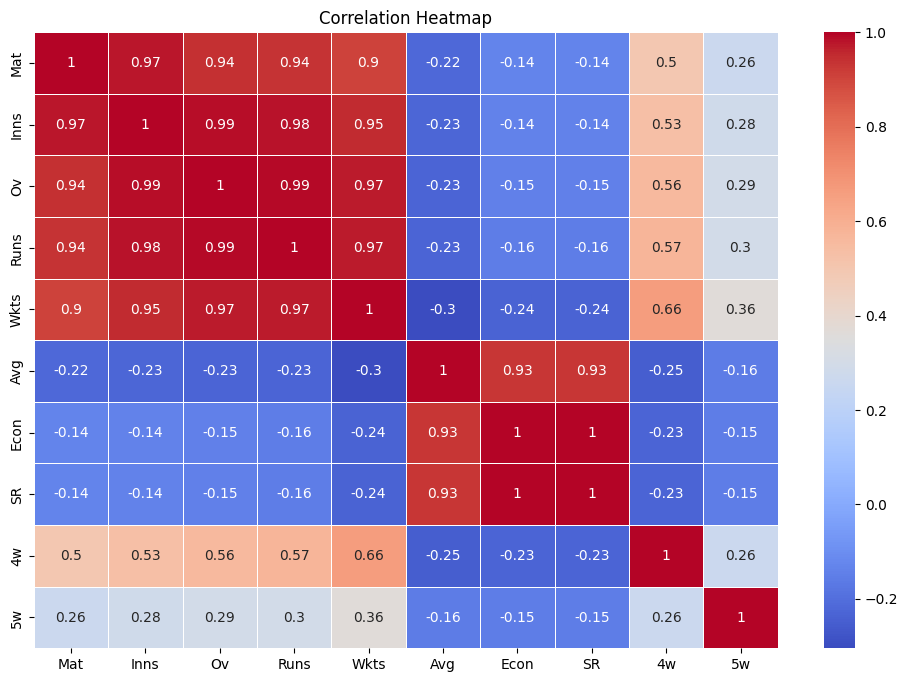

In [80]:
# Correlation Heatmap
correlation_matrix = bowling_stats.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

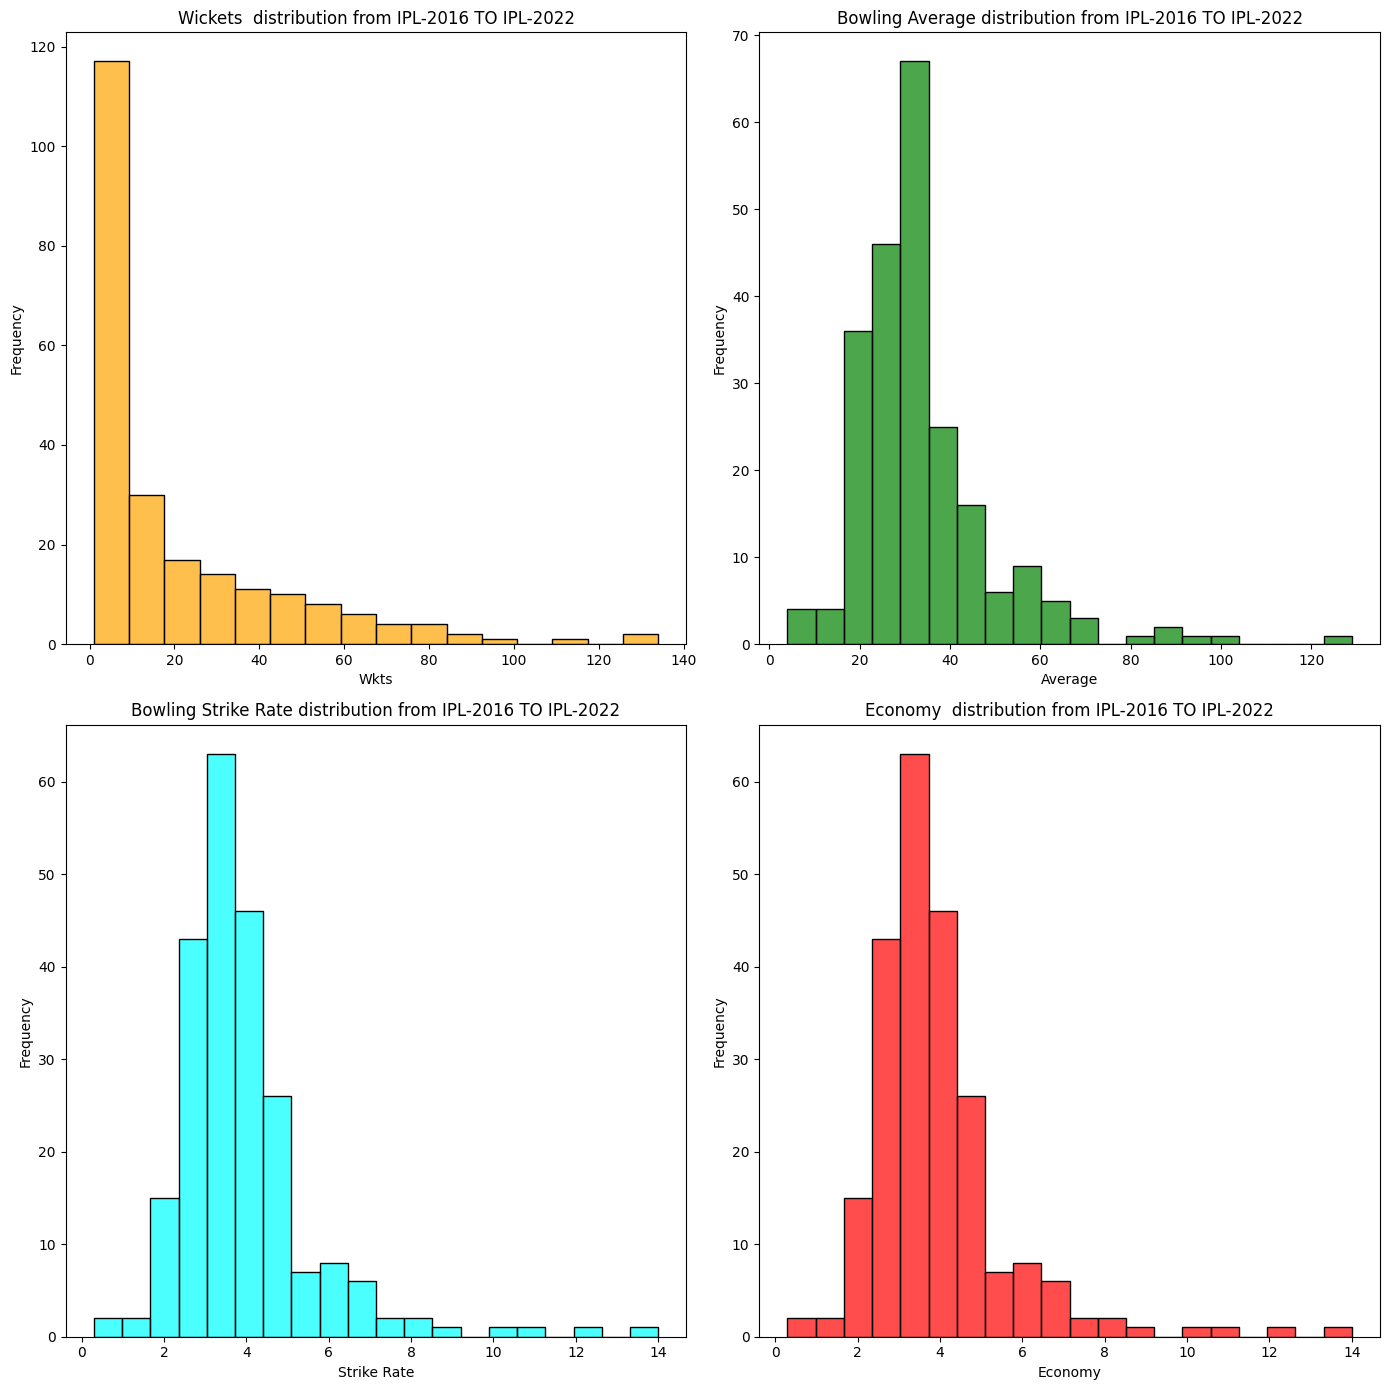

In [81]:


# Create a figure with two subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

# Subplot 1: Runs distribution
sns.histplot(bowling_stats['Wkts'], ax=axes[0,0],color='orange', alpha=0.7)
axes[0,0].set_xlabel('Wkts')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Wickets  distribution from IPL-2016 TO IPL-2022')

#Subplot 2: average distribution
sns.histplot(bowling_stats['Avg'],ax=axes[0,1], bins=20,color='green',alpha=0.7)
axes[0,1].set_xlabel('Average')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Bowling Average distribution from IPL-2016 TO IPL-2022')


# Subplot 3: Strke Rate distribution
sns.histplot(bowling_stats['SR'],ax=axes[1,0],color='aqua', bins=20,alpha=0.7)
axes[1,0].set_xlabel('Strike Rate')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Bowling Strike Rate distribution from IPL-2016 TO IPL-2022')

# Subplot 4: Total Boundary  distribution
sns.histplot(bowling_stats['Econ'],ax=axes[1,1],color='red', bins=20,alpha=0.7)
axes[1,1].set_xlabel('Economy')
axes[1,1].set_ylabel('Frequency')
axes[1,1].set_title('Economy  distribution from IPL-2016 TO IPL-2022')





# Adjust layout and display the plots
plt.tight_layout()
plt.show()


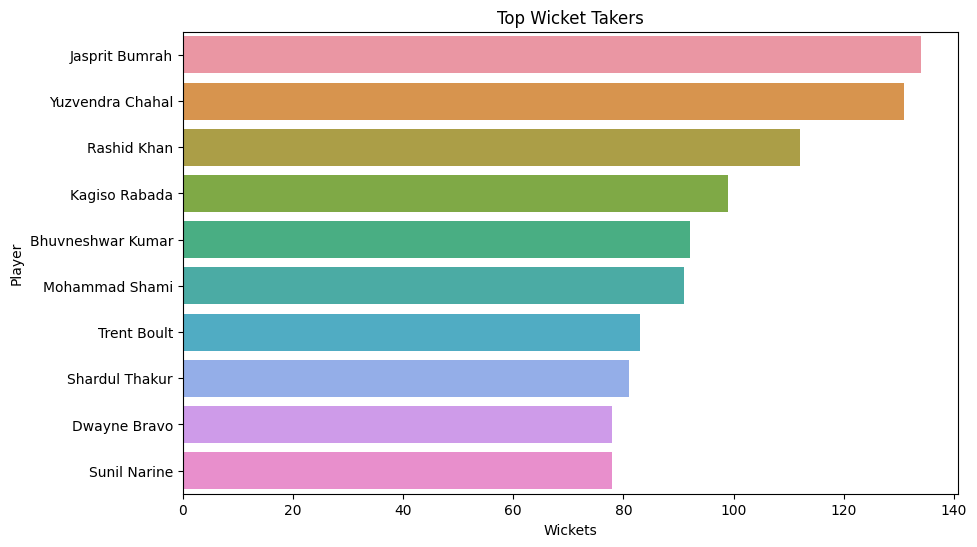

In [82]:
sns.set_palette('inferno') 

# Visualize top players by Wickets
top_wicket_takers = bowling_stats.sort_values(by='Wkts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Wkts', y='Player', data=top_wicket_takers)
plt.title('Top Wicket Takers')
plt.xlabel('Wickets')
plt.ylabel('Player')

plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_30064\4163089234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Avg'] = filtered_df.apply(lambda row: row['Runs'] / row['Wkts'] if row['Wkts'] > 0 else 0, axis=1)


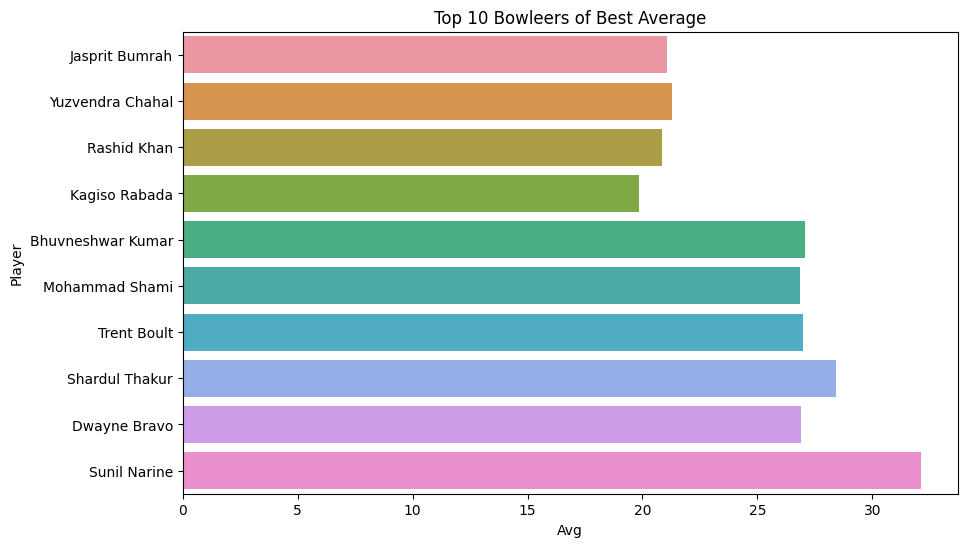

In [83]:
sns.set_palette('husl') 
filtered_df = bowling_stats[bowling_stats['Wkts'] >= 30]

#Calculate Average
filtered_df['Avg'] = filtered_df.apply(lambda row: row['Runs'] / row['Wkts'] if row['Wkts'] > 0 else 0, axis=1)

# Visualize top players by Average
best_avg = bowling_stats.sort_values(by='Wkts', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Avg', y='Player', data=best_avg)
plt.title('Top 10 Bowleers of Best Average')
plt.xlabel('Avg')
plt.ylabel('Player')

plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_30064\165451796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SR'] = filtered_df.apply(lambda row: row['Ov'] / row['Wkts'] if row['Wkts'] > 0 else 0, axis=1)


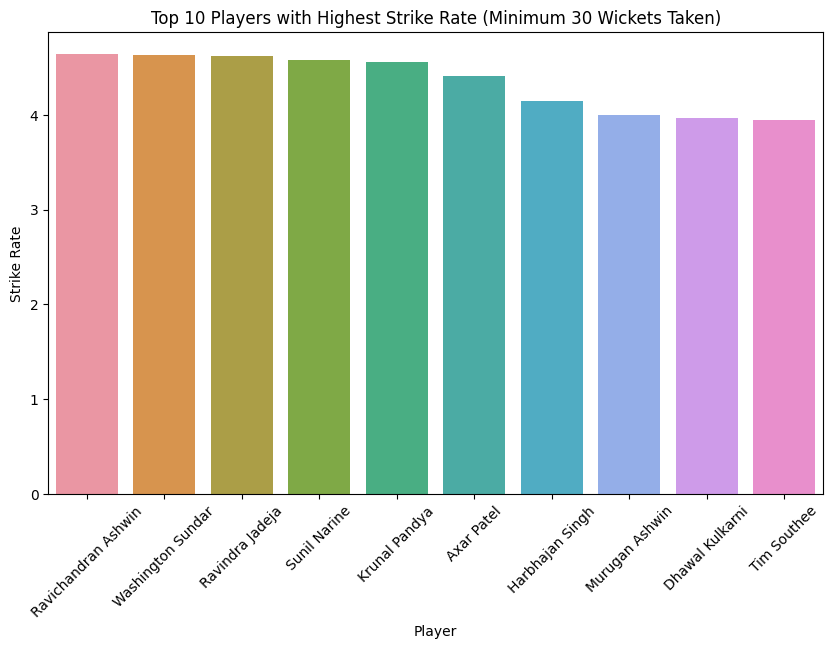

In [84]:
#color settings
sns.set_palette('viridis') 

filtered_df = bowling_stats[bowling_stats['Wkts'] >= 30]

# Calculate strike rate

filtered_df['SR'] = filtered_df.apply(lambda row: row['Ov'] / row['Wkts'] if row['Wkts'] > 0 else 0, axis=1)

# Sort by strike rate in descending order
sorted_df = filtered_df.sort_values(by='SR', ascending=False)

# Select top 10 players
top_SR_30 = sorted_df.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='SR', data=top_SR_30)
plt.xlabel('Player')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.title('Top 10 Players with Highest Strike Rate (Minimum 30 Wickets Taken)')
plt.show()


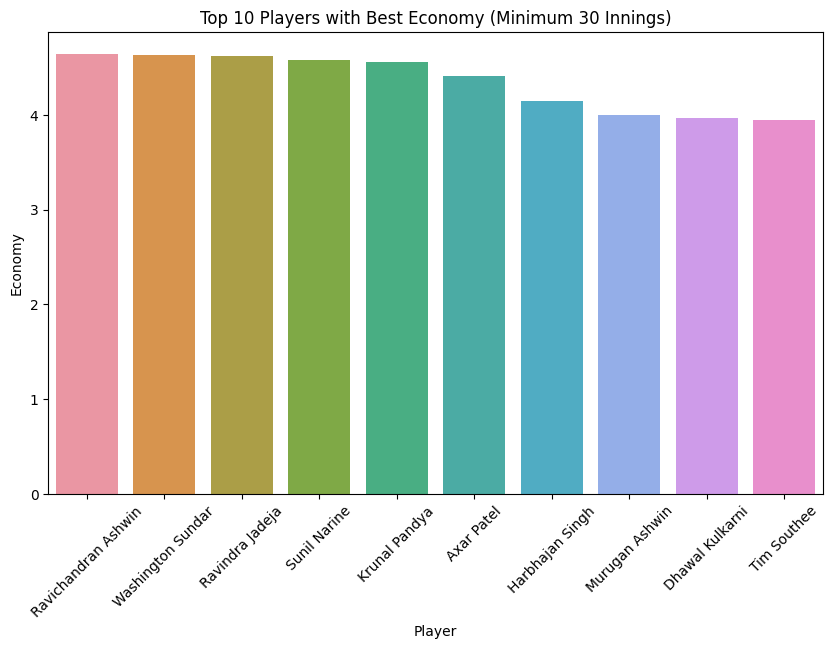

In [85]:
#color settings
sns.set_palette('viridis') 

filtered_df = bowling_stats[bowling_stats['Inns'] >= 30]

#Calculate Economy

# Sort by strike rate in descending order
bowling_stats['Econ'] = bowling_stats.apply(lambda row: row['Runs'] / row['Ov'] if row['Ov'] > 0 else 0, axis=1)

# Select top 10 players
top_econ = sorted_df.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Player', y='SR', data=top_econ)
plt.xlabel('Player')
plt.ylabel('Economy')
plt.xticks(rotation=45)
plt.title('Top 10 Players with Best Economy (Minimum 30 Innings)')
plt.show()


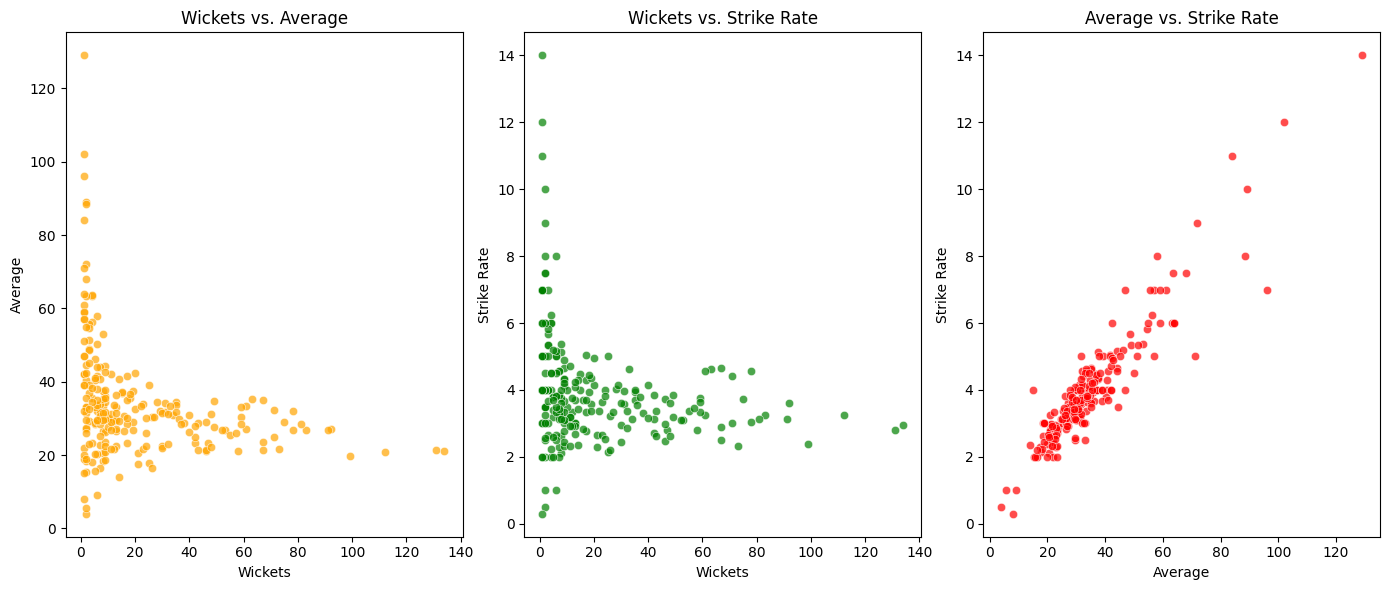

In [86]:



# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Subplot 1: Wickets vs. Average
sns.scatterplot(data=bowling_stats, x='Wkts', y='Avg', ax=axes[0], color='orange', alpha=0.7)
axes[0].set_xlabel('Wickets')
axes[0].set_ylabel('Average')
axes[0].set_title('Wickets vs. Average')

# Subplot 2: Wickets vs. Strike Rate
sns.scatterplot(data=bowling_stats, x='Wkts', y='SR', ax=axes[1], color='green', alpha=0.7)
axes[1].set_xlabel('Wickets')
axes[1].set_ylabel('Strike Rate')
axes[1].set_title('Wickets vs. Strike Rate')

#Subplot 3: Average vs. Strike Rate
sns.scatterplot(data=bowling_stats, x='Avg', y='SR', ax=axes[2], color='red', alpha=0.7)
axes[2].set_xlabel('Average')
axes[2].set_ylabel('Strike Rate')
axes[2].set_title('Average vs. Strike Rate')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


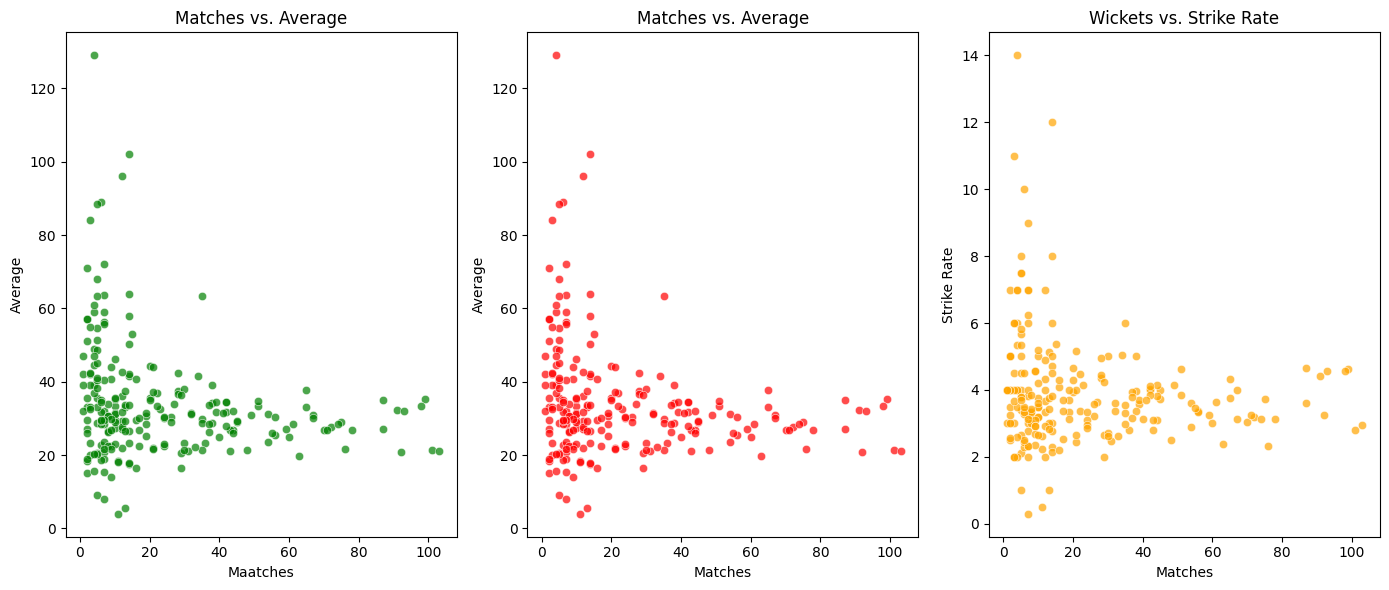

In [87]:



# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Subplot 1: Matches vs. Wickets
sns.scatterplot(data=bowling_stats, x='Mat', y='Avg', ax=axes[0], color='green', alpha=0.7)
axes[0].set_xlabel('Maatches')
axes[0].set_ylabel('Average')
axes[0].set_title('Matches vs. Average')

# Subplot 2: Matches vs. Average
sns.scatterplot(data=bowling_stats, x='Mat', y='Avg', ax=axes[1], color='red', alpha=0.7)
axes[1].set_xlabel('Matches')
axes[1].set_ylabel('Average')
axes[1].set_title('Matches vs. Average')


# Subplot 3: Matches vs. Strike Rate
sns.scatterplot(data=bowling_stats, x='Mat', y='SR', ax=axes[2], color='orange', alpha=0.7)
axes[2].set_xlabel('Matches')
axes[2].set_ylabel('Strike Rate')
axes[2].set_title('Wickets vs. Strike Rate')



# Adjust layout and display the plots
plt.tight_layout()
plt.show()


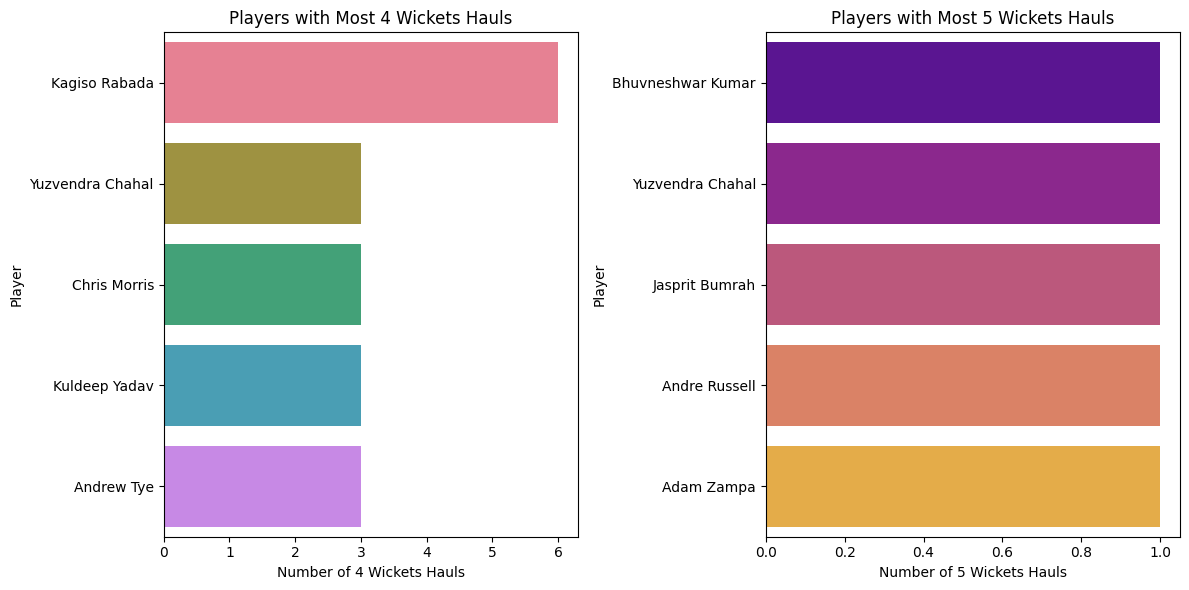

In [88]:
# Calculate the top 10 players with the most 4w and 5w hauls
top_5_4w = bowling_stats.nlargest(5, '4w')
top_5_5w = bowling_stats.nlargest(5, '5w')

# Create two separate bar plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for most 4w
sns.barplot(data=top_5_4w, x='4w', y="Player", ax=axes[0],  palette="husl")
axes[0].set_xlabel("Number of 4 Wickets Hauls")
axes[0].set_ylabel("Player")
axes[0].set_title("Players with Most 4 Wickets Hauls")

# Bar plot for most 5w
sns.barplot(data=top_5_5w, x='5w', y="Player", ax=axes[1],  palette="plasma")
axes[1].set_xlabel("Number of 5 Wickets Hauls")
axes[1].set_ylabel("Player")
axes[1].set_title("Players with Most 5 Wickets Hauls")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()